In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./smoking_driking_dataset.csv')

# shfaq te informatat per datasetin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797134 entries, 0 to 797133
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               797134 non-null  object 
 1   age               797134 non-null  int64  
 2   height            797134 non-null  int64  
 3   weight            797134 non-null  int64  
 4   waistline         797134 non-null  float64
 5   sight_left        797134 non-null  float64
 6   sight_right       797134 non-null  float64
 7   hear_left         797134 non-null  float64
 8   hear_right        797134 non-null  float64
 9   SBP               797134 non-null  float64
 10  DBP               797134 non-null  float64
 11  BLDS              797134 non-null  float64
 12  tot_chole         797134 non-null  float64
 13  HDL_chole         797134 non-null  float64
 14  LDL_chole         797134 non-null  float64
 15  triglyceride      797134 non-null  float64
 16  hemoglobin        79

In [3]:
# Drop columns that we don't need
columns_to_drop = ['waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'serum_creatinine', 'urine_protein']
df = df.drop(columns=columns_to_drop)

print("DataFrame after dropping columns:")
print(df)

DataFrame after dropping columns:
           sex  age  height  weight    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0         Male   35     170      75  120.0  80.0   99.0      193.0       48.0   
1         Male   30     180      80  130.0  82.0  106.0      228.0       55.0   
2         Male   40     165      75  120.0  70.0   98.0      136.0       41.0   
3         Male   50     175      80  145.0  87.0   95.0      201.0       76.0   
4         Male   50     165      60  138.0  82.0  101.0      199.0       61.0   
...        ...  ...     ...     ...    ...   ...    ...        ...        ...   
797129    Male   25     170      85  112.0  70.0   97.0      164.0       52.0   
797130    Male   45     170      70  120.0  70.0   93.0      138.0       33.0   
797131    Male   45     160      70  110.0  65.0  103.0      162.0       68.0   
797132    Male   35     175      65  110.0  70.0   98.0      211.0       44.0   
797133  Female   45     150      45  103.0  65.0   81.0      167.0       51

In [4]:
import great_expectations as gx

context = gx.get_context()

validator = context.sources.pandas_default.read_csv(
    "./smoking_driking_dataset.csv"
)

In [5]:
validator.expect_column_values_to_be_between(column='age', min_value=20, max_value=90)

Calculating Metrics: 100%|██████████| 8/8 [00:00<00:00, 34.03it/s]  


{
  "success": true,
  "result": {
    "element_count": 797134,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [6]:
validator.expect_column_values_to_be_in_set(column='sex', value_set=['Male', 'Female'])

Calculating Metrics: 100%|██████████| 8/8 [00:00<00:00, 36.42it/s]  


{
  "success": true,
  "result": {
    "element_count": 797134,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [7]:
validator.expect_column_values_to_be_in_set(column='DRK_YN', value_set=['Y', 'N'])

Calculating Metrics: 100%|██████████| 8/8 [00:00<00:00, 45.79it/s]  


{
  "success": true,
  "result": {
    "element_count": 797134,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [8]:
validator.expect_column_values_to_be_in_set(column='SMK_stat_type_cd', value_set=[1.0, 2.0,3.0])

Calculating Metrics: 100%|██████████| 8/8 [00:00<00:00, 76.69it/s]  


{
  "success": true,
  "result": {
    "element_count": 797134,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [9]:
#DUPLICATION
duplicates = df[df.duplicated(keep='first')]
print("First occurrences of duplicates:")
print(duplicates)

First occurrences of duplicates:
           sex  age  height  weight    SBP    DBP   BLDS  tot_chole  \
159911  Female   40     170      85  120.0   70.0  110.0      191.0   
175152    Male   65     170      75  130.0   70.0  114.0      175.0   
246305  Female   50     155      70  150.0   96.0  101.0      230.0   
280830    Male   45     170      75  150.0   78.0  195.0      222.0   
284528  Female   65     150      55  120.0   65.0   99.0      228.0   
290463  Female   20     160      50  106.0   68.0   76.0      154.0   
335747    Male   50     180      95  177.0  111.0  141.0      184.0   
429596    Male   75     160      60  105.0   70.0  114.0      218.0   
453451    Male   35     170      65  130.0   78.0   99.0      149.0   
471596  Female   45     165      65  120.0   80.0   87.0      178.0   
479756    Male   50     165      65  115.0   75.0   96.0      219.0   
555137    Male   30     165      95  122.0   79.0   92.0      243.0   
558263  Female   65     145      50  154.0  

In [10]:
# Removing duplicates
df = df.drop_duplicates()

print(df)

           sex  age  height  weight    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0         Male   35     170      75  120.0  80.0   99.0      193.0       48.0   
1         Male   30     180      80  130.0  82.0  106.0      228.0       55.0   
2         Male   40     165      75  120.0  70.0   98.0      136.0       41.0   
3         Male   50     175      80  145.0  87.0   95.0      201.0       76.0   
4         Male   50     165      60  138.0  82.0  101.0      199.0       61.0   
...        ...  ...     ...     ...    ...   ...    ...        ...        ...   
797129    Male   25     170      85  112.0  70.0   97.0      164.0       52.0   
797130    Male   45     170      70  120.0  70.0   93.0      138.0       33.0   
797131    Male   45     160      70  110.0  65.0  103.0      162.0       68.0   
797132    Male   35     175      65  110.0  70.0   98.0      211.0       44.0   
797133  Female   45     150      45  103.0  65.0   81.0      167.0       51.0   

        LDL_chole  triglyce

In [11]:
# Completeness
#identifiko te dhenat null
print('te dhenat null')
df.isnull().sum()

te dhenat null


sex                 0
age                 0
height              0
weight              0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [12]:
# Aggregation: Calculate average cholesterol levels for each smoking category
agg_result = df.groupby('SMK_stat_type_cd').agg({
    'tot_chole': 'mean',
    'HDL_chole': 'mean',
    'LDL_chole': 'mean',
    'triglyceride': 'mean'
}).reset_index()

# Display the aggregated result
print("\nAggregated Result:")
print(agg_result)


Aggregated Result:
   SMK_stat_type_cd   tot_chole  HDL_chole   LDL_chole  triglyceride
0               1.0  195.300785  59.244853  113.339368    115.105830
1               2.0  194.995537  53.814432  112.881392    147.450016
2               3.0  196.657818  52.912406  112.297339    167.822476


In [13]:
agg_result = df.groupby(['SMK_stat_type_cd', 'sex']).agg({
    'tot_chole': 'mean',
    'HDL_chole': 'mean',
    'LDL_chole': 'mean',
    'triglyceride': 'mean'
}).reset_index()

# Display the aggregated result
print("\nAggregated Result:")
print(agg_result)


Aggregated Result:
   SMK_stat_type_cd     sex   tot_chole  HDL_chole   LDL_chole  triglyceride
0               1.0  Female  196.529004  61.528540  113.525528    107.891981
1               1.0    Male  192.034959  53.172544  112.844369    134.287411
2               2.0  Female  194.358385  63.984309  108.321319    111.594088
3               2.0    Male  195.037945  53.137544  113.184902    149.836522
4               3.0  Female  194.938358  62.819728  107.554242    126.680119
5               3.0    Male  196.799668  52.095084  112.688629    171.216589


In [14]:
bins = [20, 40, 60, 80, 100]
labels = ['20-40', '40-60', '60-80', '80-100']
df['Age_Binned'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

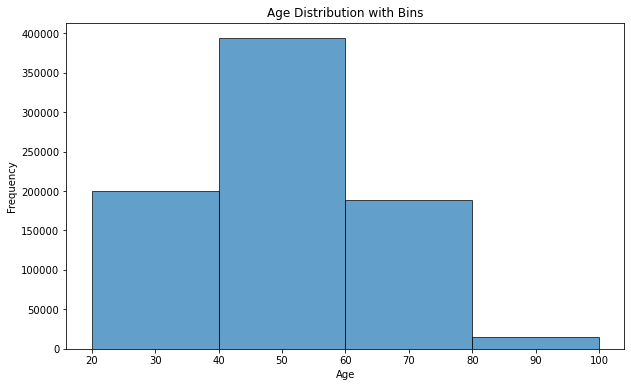

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Age Distribution with Bins')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [16]:
df = df.drop(columns=['age'])
print(df)

           sex  height  weight    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0         Male     170      75  120.0  80.0   99.0      193.0       48.0   
1         Male     180      80  130.0  82.0  106.0      228.0       55.0   
2         Male     165      75  120.0  70.0   98.0      136.0       41.0   
3         Male     175      80  145.0  87.0   95.0      201.0       76.0   
4         Male     165      60  138.0  82.0  101.0      199.0       61.0   
...        ...     ...     ...    ...   ...    ...        ...        ...   
797129    Male     170      85  112.0  70.0   97.0      164.0       52.0   
797130    Male     170      70  120.0  70.0   93.0      138.0       33.0   
797131    Male     160      70  110.0  65.0  103.0      162.0       68.0   
797132    Male     175      65  110.0  70.0   98.0      211.0       44.0   
797133  Female     150      45  103.0  65.0   81.0      167.0       51.0   

        LDL_chole  triglyceride  hemoglobin  SMK_stat_type_cd DRK_YN  \
0           126

In [17]:
bins = [60, 90, 130, 200]
labels = ['Low', 'Normal', 'High']
df['BLDS_Category'] = pd.cut(df['BLDS'], bins=bins, labels=labels, right=False)


# Display the DataFrame after discretization
print("DataFrame after Discretization:")
print(df)

DataFrame after Discretization:
           sex  height  weight    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0         Male     170      75  120.0  80.0   99.0      193.0       48.0   
1         Male     180      80  130.0  82.0  106.0      228.0       55.0   
2         Male     165      75  120.0  70.0   98.0      136.0       41.0   
3         Male     175      80  145.0  87.0   95.0      201.0       76.0   
4         Male     165      60  138.0  82.0  101.0      199.0       61.0   
...        ...     ...     ...    ...   ...    ...        ...        ...   
797129    Male     170      85  112.0  70.0   97.0      164.0       52.0   
797130    Male     170      70  120.0  70.0   93.0      138.0       33.0   
797131    Male     160      70  110.0  65.0  103.0      162.0       68.0   
797132    Male     175      65  110.0  70.0   98.0      211.0       44.0   
797133  Female     150      45  103.0  65.0   81.0      167.0       51.0   

        LDL_chole  triglyceride  hemoglobin  SMK_stat_t

In [18]:
# Binarize those two columns and convert into numbers 0 and 1
df_onehot = pd.get_dummies(df, columns=['sex', 'DRK_YN'], drop_first=True)

In [19]:
df_onehot

,height,weight,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,SMK_stat_type_cd,Age_Binned,BLDS_Category,sex_Male,DRK_YN_Y
0,170,75,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,20-40,Normal,1,1
1,180,80,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,3.0,20-40,Normal,1,0
2,165,75,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,40-60,Normal,1,0
3,175,80,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,40-60,Normal,1,0
4,165,60,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,40-60,Normal,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797129,170,85,112.0,70.0,97.0,164.0,52.0,75.0,184.0,18.0,1.0,20-40,Normal,1,1
797130,170,70,120.0,70.0,93.0,138.0,33.0,87.0,86.0,15.5,2.0,40-60,Normal,1,1
797131,160,70,110.0,65.0,103.0,162.0,68.0,81.0,66.0,14.0,2.0,40-60,Normal,1,1
797132,175,65,110.0,70.0,98.0,211.0,44.0,92.0,375.0,15.2,3.0,20-40,Normal,1,1


In [20]:
# Detektimi i përjashtuesit
print(df_onehot.dtypes)


height                 int64
weight                 int64
SBP                  float64
DBP                  float64
BLDS                 float64
tot_chole            float64
HDL_chole            float64
LDL_chole            float64
triglyceride         float64
hemoglobin           float64
SMK_stat_type_cd     float64
Age_Binned          category
BLDS_Category       category
sex_Male               uint8
DRK_YN_Y               uint8
dtype: object


Outliers:
Empty DataFrame
Columns: [height, weight, SBP, DBP, BLDS, tot_chole, HDL_chole, LDL_chole, triglyceride, hemoglobin, SMK_stat_type_cd, Age_Binned, BLDS_Category, sex_Male, DRK_YN_Y]
Index: []


<AxesSubplot:>

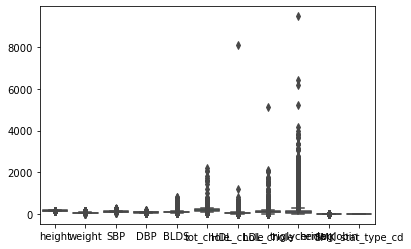

In [21]:
import pandas as pd
import seaborn as sns
from scipy.stats import zscore

# Select numeric columns
numeric_columns = df_onehot.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for each numeric column
z_scores = np.abs(zscore(df_onehot[numeric_columns]))

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).all(axis=1)

# Display outliers
outlier_rows = df_onehot[outliers]
print("Outliers:")
print(outlier_rows)

# Visualize outliers using a box plot
sns.boxplot(data=df_onehot[numeric_columns])


Outliers using IQR:
        height  weight    SBP    DBP   BLDS  tot_chole  HDL_chole  LDL_chole  \
9          175      75  132.0  105.0  100.0      195.0       60.0      118.0   
11         155      75  109.0   69.0  137.0      115.0       31.0       57.0   
22         155      50  109.0   64.0  111.0      170.0       39.0       64.0   
26         145      50  122.0   74.0   81.0      293.0       29.0      215.0   
35         170      60  133.0   84.0   93.0      232.0      100.0      110.0   
...        ...     ...    ...    ...    ...        ...        ...        ...   
797099     160      55  125.0   80.0  106.0      272.0       63.0      207.0   
797106     185     100  132.0   86.0  116.0      213.0       42.0      145.0   
797110     165      65  120.0   80.0  134.0      126.0       36.0       69.0   
797120     160      80  169.0   94.0  107.0      159.0       38.0       77.0   
797132     175      65  110.0   70.0   98.0      211.0       44.0       92.0   

        triglycerid

<AxesSubplot:>

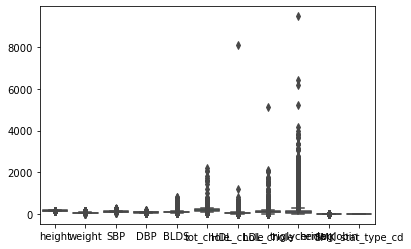

In [22]:
# Calculate IQR for each numeric column
Q1 = df_onehot[numeric_columns].quantile(0.25)
Q3 = df_onehot[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers_iqr = ((df_onehot[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_onehot[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Display outliers using IQR
outlier_rows_iqr = df_onehot[outliers_iqr]
print("Outliers using IQR:")
print(outlier_rows_iqr)

# Visualize outliers using a box plot with IQR
sns.boxplot(data=df_onehot[numeric_columns])


In [23]:
# Before removing outliers
summary_before = df_onehot.describe()

# After removing outliers
# Assuming outliers_iqr is the boolean mask for outliers using IQR
df_cleaned = df_onehot[~outliers_iqr]

summary_after = df_cleaned.describe()

# Compare the two summaries
print("Before removing outliers:")
print(summary_before)
print("\nAfter removing outliers:")
print(summary_after)

Before removing outliers:
              height         weight            SBP            DBP  \
count  797114.000000  797114.000000  797114.000000  797114.000000   
mean      162.248405      63.296705     122.435287      76.052235   
std         9.279105      12.515080      14.544695       9.890235   
min       130.000000      25.000000      70.000000      33.000000   
25%       155.000000      55.000000     112.000000      70.000000   
50%       160.000000      60.000000     120.000000      76.000000   
75%       170.000000      70.000000     131.000000      82.000000   
max       190.000000     140.000000     270.000000     185.000000   

                BLDS      tot_chole      HDL_chole      LDL_chole  \
count  797114.000000  797114.000000  797114.000000  797114.000000   
mean      100.445850     195.539632      56.918322     113.033549   
std        24.190258      38.586866      17.680866      35.814276   
min        30.000000      30.000000       1.000000       1.000000   
25%    

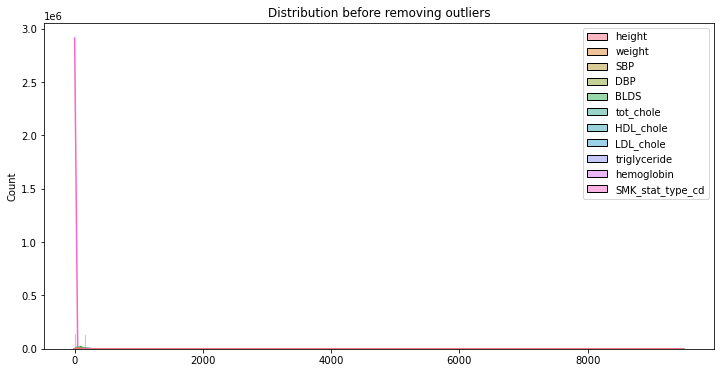

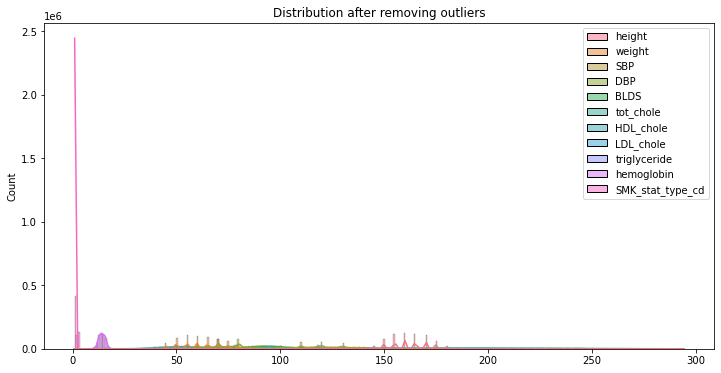

In [24]:

import matplotlib.pyplot as plt

# Before removing outliers
plt.figure(figsize=(12, 6))
sns.histplot(data=df_onehot[numeric_columns], kde=True)
plt.title("Distribution before removing outliers")
plt.show()

# After removing outliers
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned[numeric_columns], kde=True)
plt.title("Distribution after removing outliers")
plt.show()

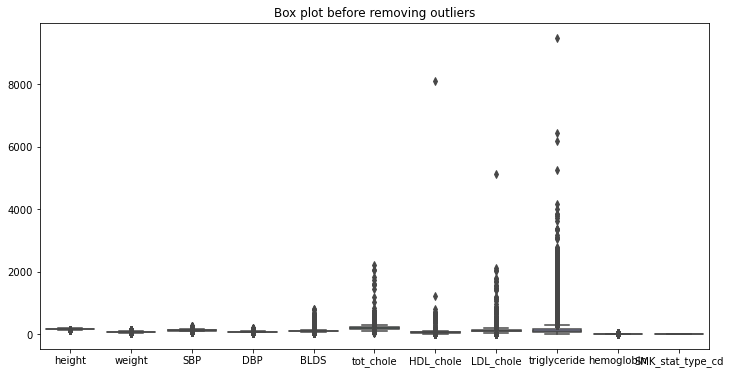

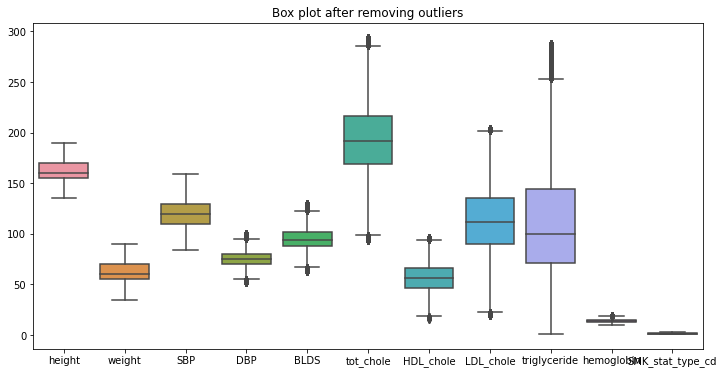

In [25]:
 
# Before removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_onehot[numeric_columns])
plt.title("Box plot before removing outliers")
plt.show()

# After removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[numeric_columns])
plt.title("Box plot after removing outliers")
plt.show()


In [26]:
#Matrix correlation
#Statistike përmbledhëse
 
# Before removing outliers
correlation_before = df_onehot[numeric_columns].corr()

# After removing outliers
correlation_after = df_cleaned[numeric_columns].corr()

# Compare the two correlation matrices
print("Correlation matrix before removing outliers:")
print(correlation_before)
print("\nCorrelation matrix after removing outliers:")
print(correlation_after)


Correlation matrix before removing outliers:
                    height    weight       SBP       DBP      BLDS  tot_chole  \
height            1.000000  0.668498  0.034934  0.109007  0.021393  -0.022420   
weight            0.668498  1.000000  0.251259  0.278309  0.138803   0.063753   
SBP               0.034934  0.251259  1.000000  0.741143  0.183877   0.069202   
DBP               0.109007  0.278309  0.741143  1.000000  0.136143   0.111941   
BLDS              0.021393  0.138803  0.183877  0.136143  1.000000   0.013011   
tot_chole        -0.022420  0.063753  0.069202  0.111941  0.013011   1.000000   
HDL_chole        -0.144878 -0.280703 -0.109738 -0.092059 -0.110872   0.164314   
LDL_chole        -0.014458  0.068422  0.034459  0.067074 -0.029710   0.876886   
triglyceride      0.137206  0.282743  0.185704  0.198268  0.205757   0.272239   
hemoglobin        0.531735  0.499302  0.166775  0.242399  0.102421   0.121594   
SMK_stat_type_cd  0.467576  0.366807  0.084981  0.127252  0.0862

In [27]:
print(df_cleaned.columns)


Index(['height', 'weight', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
       'LDL_chole', 'triglyceride', 'hemoglobin', 'SMK_stat_type_cd',
       'Age_Binned', 'BLDS_Category', 'sex_Male', 'DRK_YN_Y'],
      dtype='object')


In [28]:
from sklearn.linear_model import LinearRegression
#Eksplorimi i të dhënave, analiza multivariante
 
model = LinearRegression()
X = df_cleaned[['BLDS', 'tot_chole','triglyceride',]]
y = df_cleaned['DRK_YN_Y']
model.fit(X, y)

# Shfaq koeficientët dhe vlerat e pritura
print("Koeficientët:", model.coef_)
print("Intercept:", model.intercept_)


Koeficientët: [ 0.00066621 -0.00020586  0.00059843]
Intercept: 0.39748146633010195


In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657049 entries, 0 to 797133
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   height            657049 non-null  int64   
 1   weight            657049 non-null  int64   
 2   SBP               657049 non-null  float64 
 3   DBP               657049 non-null  float64 
 4   BLDS              657049 non-null  float64 
 5   tot_chole         657049 non-null  float64 
 6   HDL_chole         657049 non-null  float64 
 7   LDL_chole         657049 non-null  float64 
 8   triglyceride      657049 non-null  float64 
 9   hemoglobin        657049 non-null  float64 
 10  SMK_stat_type_cd  657049 non-null  float64 
 11  Age_Binned        657049 non-null  category
 12  BLDS_Category     657049 non-null  category
 13  sex_Male          657049 non-null  uint8   
 14  DRK_YN_Y          657049 non-null  uint8   
dtypes: category(2), float64(9), int64(2), uint8(2)
memo

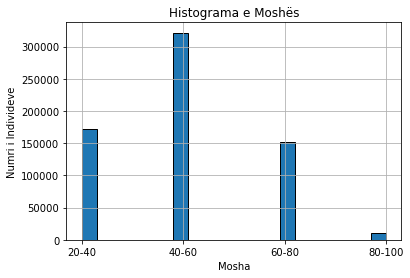

In [30]:
# Vizualizimi

import matplotlib.pyplot as plt
df_cleaned['Age_Binned'].hist(bins=20, edgecolor='black')
plt.xlabel('Mosha')
plt.ylabel('Numri i Individeve')
plt.title('Histograma e Moshës')
plt.show()


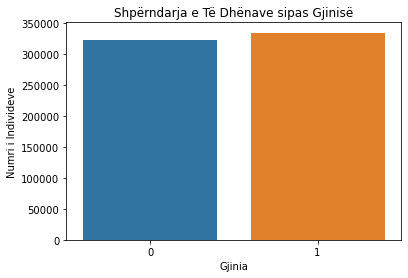

In [31]:
import seaborn as sns
sns.countplot(x='sex_Male', data=df_cleaned)
plt.xlabel('Gjinia')
plt.ylabel('Numri i Individeve')
plt.title('Shpërndarja e Të Dhënave sipas Gjinisë')
plt.show()


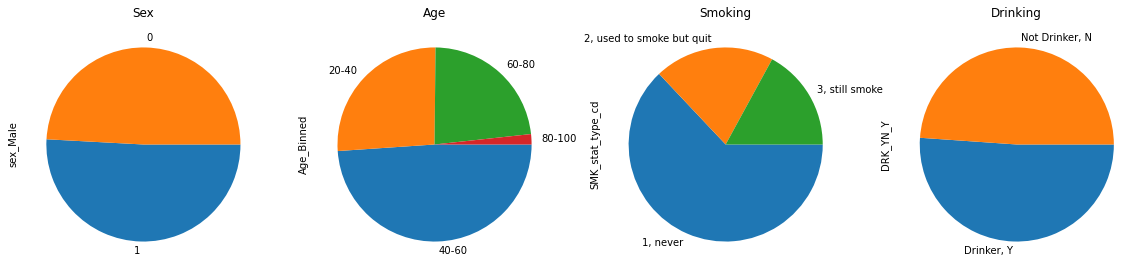

In [32]:
 
# Data Distribution

plt.figure(figsize=(20,20))

plt.subplot(1, 4, 1)    
df_cleaned['sex_Male'].value_counts().plot.pie(counterclock=False)
plt.title('Sex')

plt.subplot(1, 4, 2)    
df_cleaned['Age_Binned'].value_counts().plot.pie(counterclock=False)
plt.title('Age')

plt.subplot(1, 4, 3)   
labels = ['1, never', '2, used to smoke but quit', '3, still smoke']
df_cleaned['SMK_stat_type_cd'].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title('Smoking')

plt.subplot(1, 4, 4)    
labels = ['Drinker, Y', 'Not Drinker, N']
df_cleaned['DRK_YN_Y'].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title('Drinking')

plt.show()   


In [33]:
Drinking_age = df_cleaned.groupby(['Age_Binned', 'DRK_YN_Y'], as_index=False).agg(n = ('Age_Binned', 'count'))
Drinking_age.head()

,Age_Binned,DRK_YN_Y,n
0,20-40,0,59822
1,20-40,1,112578
2,40-60,0,158983
3,40-60,1,162470
4,60-80,0,107280


In [34]:
Smoking_Age = df_cleaned.groupby(['Age_Binned', 'DRK_YN_Y'], as_index=False).agg(n = ('Age_Binned', 'count'))
Smoking_Age.head()

,Age_Binned,DRK_YN_Y,n
0,20-40,0,59822
1,20-40,1,112578
2,40-60,0,158983
3,40-60,1,162470
4,60-80,0,107280


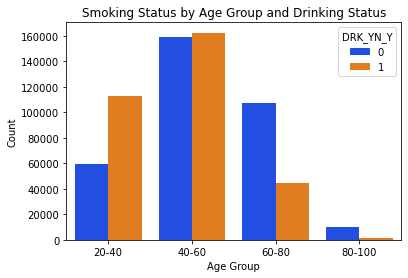

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(data=Smoking_Age, x='Age_Binned', y='n', hue='DRK_YN_Y', palette='bright')
plt.title('Smoking Status by Age Group and Drinking Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


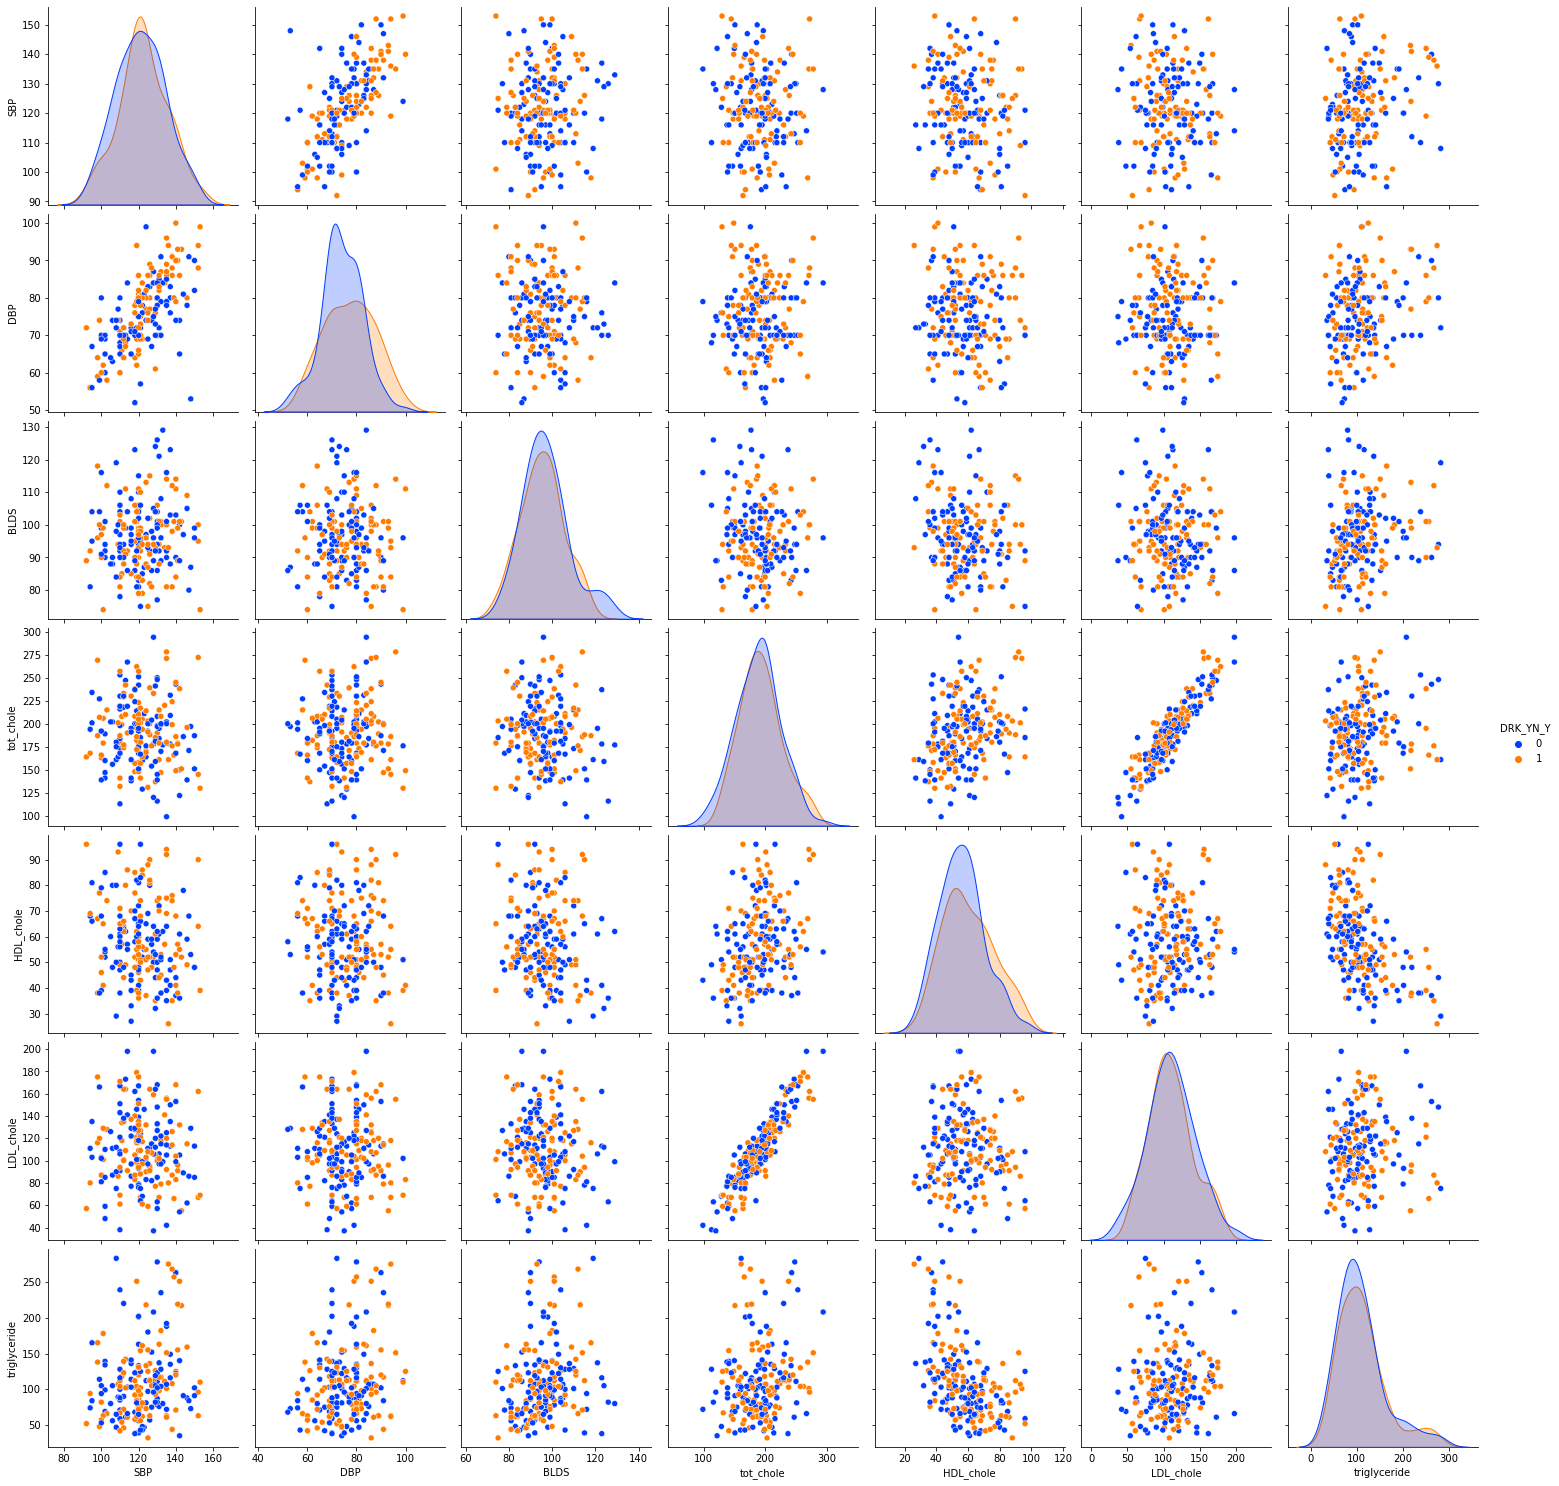

In [36]:
# sampling Drinking and Blood Index, 

body_sample = df_cleaned.sample(200)
body_Drinking_1h = body_sample[['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'DRK_YN_Y']]

sns.pairplot(body_Drinking_1h, hue = "DRK_YN_Y", size = 3, palette = 'bright')

# Drinking No N, Yes Y

In [37]:
print(df_cleaned.columns)


Index(['height', 'weight', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
       'LDL_chole', 'triglyceride', 'hemoglobin', 'SMK_stat_type_cd',
       'Age_Binned', 'BLDS_Category', 'sex_Male', 'DRK_YN_Y'],
      dtype='object')


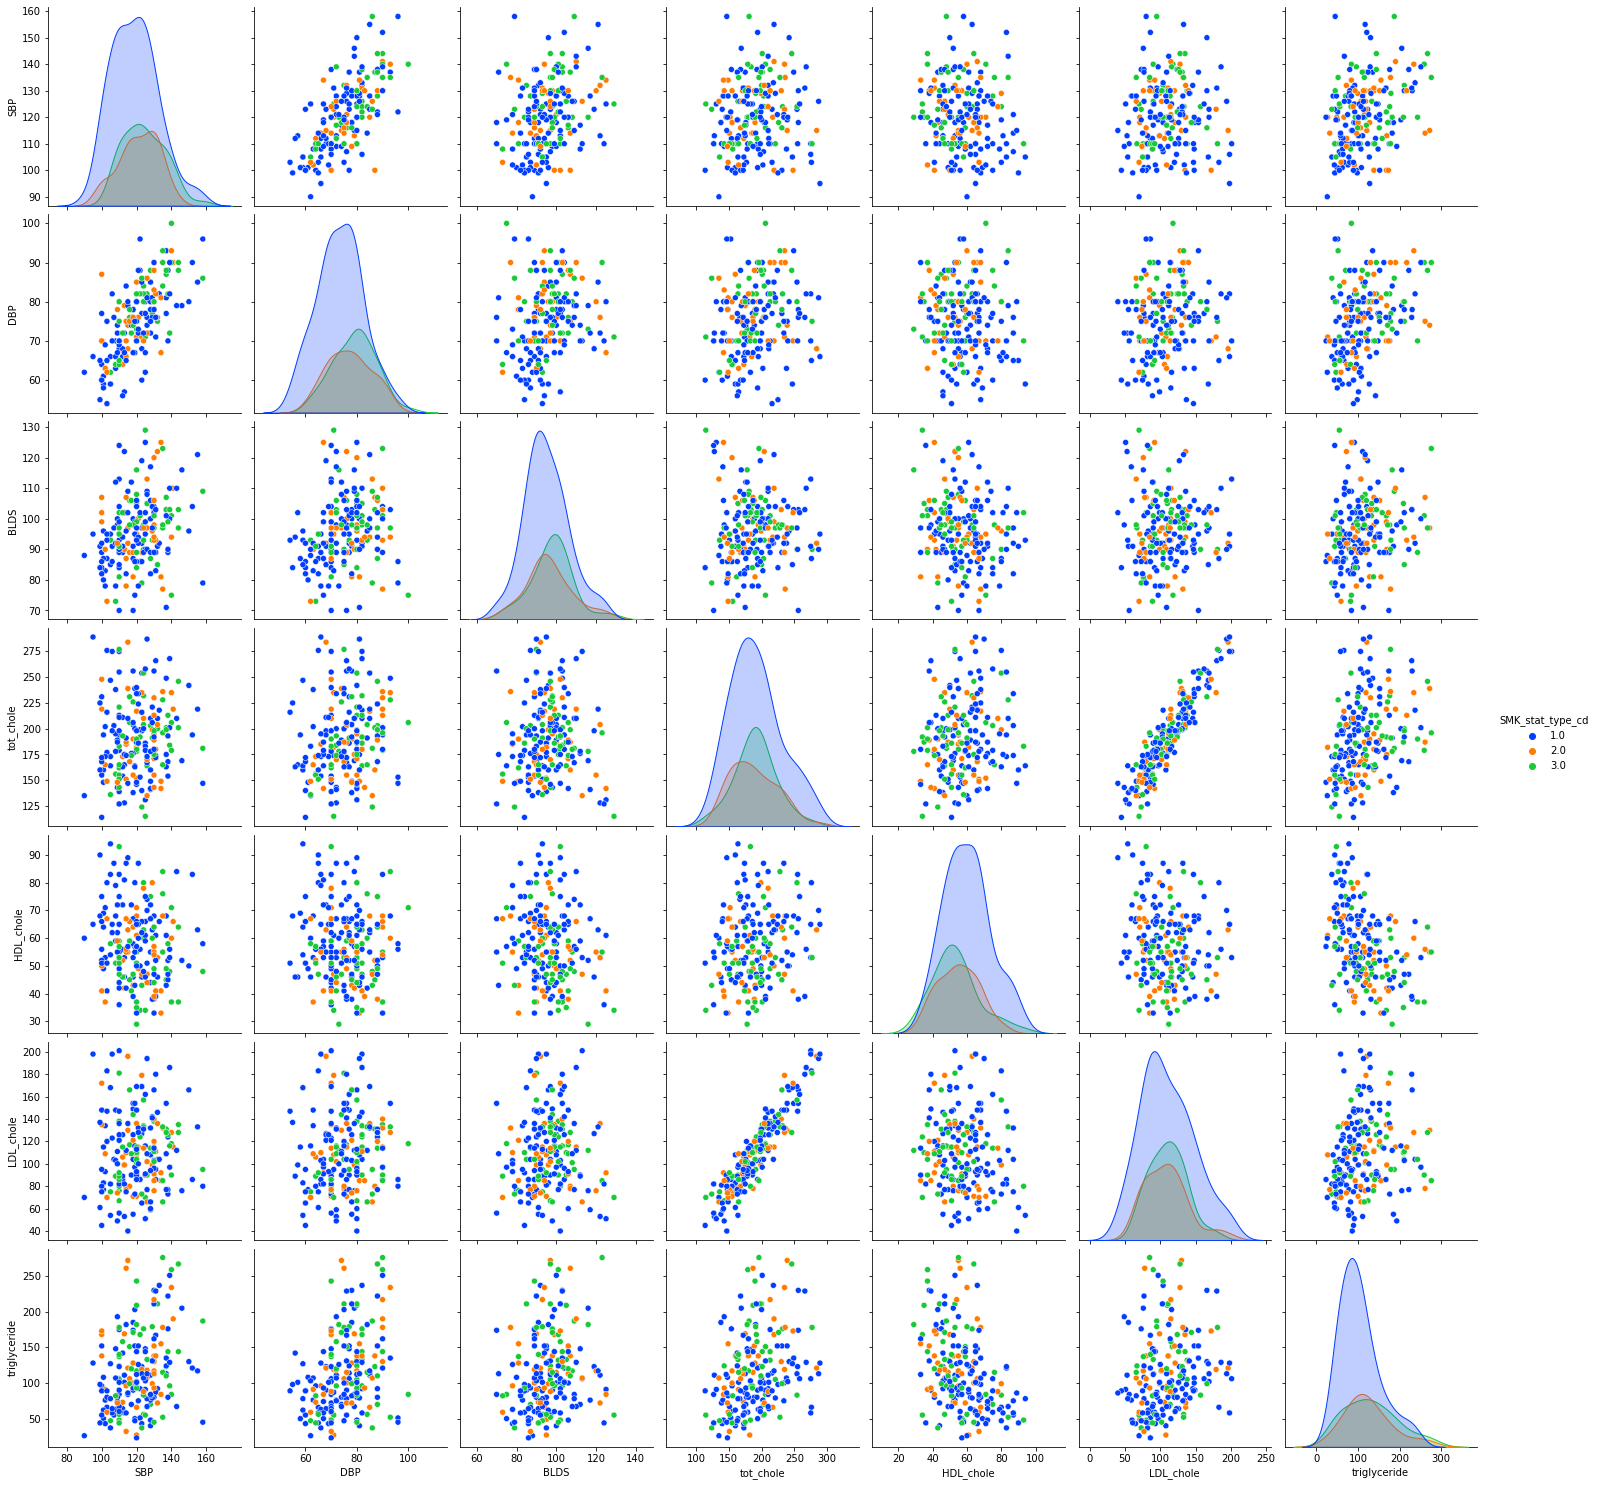

In [39]:

# sampling Smoking and Blood Index 
body_sample = df_cleaned.sample(200)
body_Smoking_1h = body_sample[['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'SMK_stat_type_cd']]

sns.pairplot(body_Smoking_1h, hue = "SMK_stat_type_cd", size = 3, palette = 'bright')

# Smoking No, Quit, Yes

 